In [68]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import random
from PIL import Image, ImageEnhance, ImageOps

In [2]:
fetch_olivetti_faces

<function sklearn.datasets._olivetti_faces.fetch_olivetti_faces(*, data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y=False)>

In [3]:
cwd = os.getcwd()

In [4]:
olivetti_face = fetch_olivetti_faces(cwd)

c:\users\marys\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass data_home=C:\Users\marys\OneDrive\Dokumenty\STUDIA\Semestr 4\Wstep do uczenia maszynowego\PraceDomowe as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Załadowanie zdjęć

In [5]:
images = olivetti_face['images']

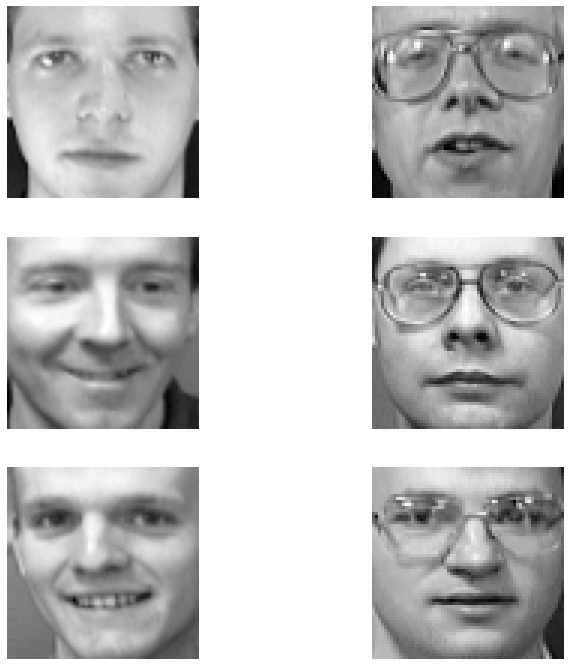

In [191]:
f = plt.figure(figsize=[12, 12])
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.imshow(images[i * 10], cmap='gray')
    plt.axis('off')

In [7]:
data = olivetti_face['data']

In [8]:
df = pd.DataFrame(data)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


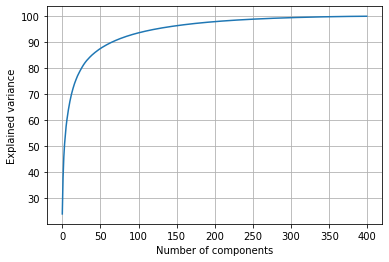

In [10]:
pca= PCA(n_components=400)
pca.fit(df)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [192]:
pca = PCA(n_components=100)
df_compressed = pca.fit_transform(df)

## Stopień kompresji

In [193]:
CR = 64 * 64 / 100
print(CR)

40.96


## Transformacja odwrotna

Text(0.5, 1.0, 'Decompressed image from 30 components, original image')

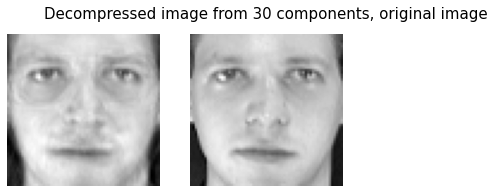

In [194]:
df_decompressed = pca.inverse_transform(df_compressed)

image_pca = df_decompressed[0,:].reshape([64,64])
f, ax = plt.subplots(1, 2)
ax[0].imshow(image_pca, cmap='gray')
ax[0].axis('off')
ax[1].imshow(images[0], cmap='gray')
ax[1].axis('off')
plt.title('Decompressed image from 30 components, original image', fontsize=15, pad=15)

In [195]:
MSE = np.sum(np.square(df - df_decompressed), axis=1) / 4096
RMSE = np.sqrt(MSE)
RMSE.describe()

count    400.000000
mean       0.035135
std        0.004381
min        0.024039
25%        0.032047
50%        0.034726
75%        0.038391
max        0.047065
dtype: float64

In [196]:
RMSE/np.std(df, axis=1)

0      0.224659
1      0.197404
2      0.227574
3      0.167216
4      0.191997
         ...   
395    0.210001
396    0.188265
397    0.189227
398    0.184744
399    0.202790
Length: 400, dtype: float32

### Obserwacje
RMSE jest dość małe i podobne dla większosci obrazków.

## Modyfikacje wybranych obrazków

In [78]:
def plot_images(images_true, images_modified, n):
    f = plt.figure(figsize=[8, 20])
    for i in range(0,n):
        plt.subplot(n, 2, 2 * i + 1)
        plt.imshow(images_true[i], cmap='gray')
        plt.axis('off')
        plt.subplot(n, 2, 2 * i + 2)
        plt.imshow(images_modified[i], cmap='gray')
        plt.axis('off')

In [87]:
df_results = pd.DataFrame({'RMSE':[]})

### Rotacja o 90 stopni 

In [198]:
arr = np.arange(400)
np.random.shuffle(arr)
images_to_rotate = images

In [199]:
def rotate_image(x):
    img = Image.fromarray(np.uint8(x * 255), 'L')
    img = np.array(img.rotate(90)).squeeze()
    return img

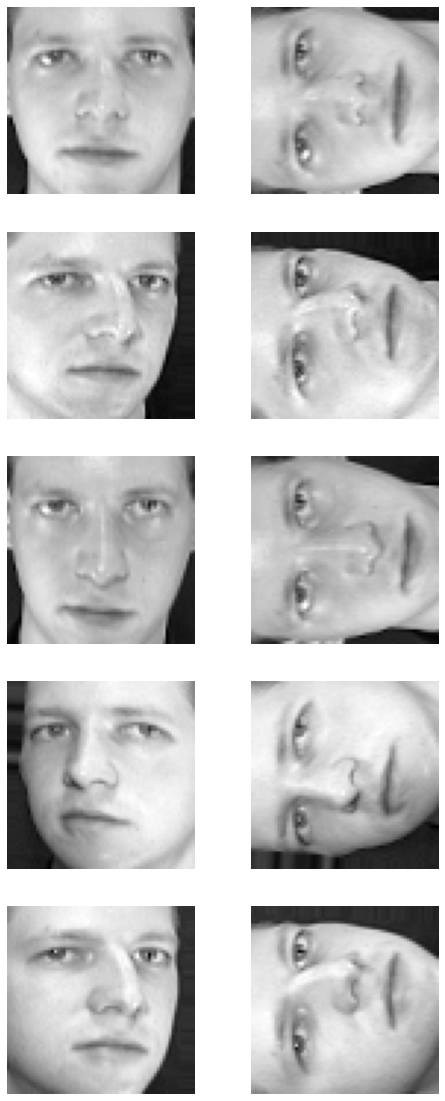

In [200]:
rotated_images = []
for i in range(len(images)):
    img = rotate_image(images_to_rotate[i])
    rotated_images.append(img)
    
plot_images(images_to_rotate, rotated_images, 5)

In [201]:
def reshape_img_arr(image_arr):
    image_arr = np.array(image_arr)
    image_arr = image_arr.reshape(len(image_arr), 4096)
    return image_arr
compressed = pca.fit_transform(reshape_img_arr(rotated_images))

Text(0.5, 1.0, 'Decompressed PCA rotated image')

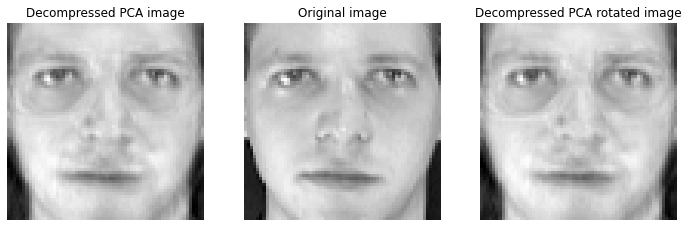

In [202]:
decompressed = pca.inverse_transform(compressed)
decompressed_r = []
for img in decompressed:
    img_r = Image.fromarray(np.uint8(img.reshape(64, 64)), 'L').rotate(-90)
    decompressed_r.append(np.array(img_r) / 255)

decompressed_r = np.array(decompressed_r)
image_pca_r = decompressed[0,:].reshape([64,64])
image_pca_r = Image.fromarray(np.uint8(image_pca_r), 'L').rotate(-90)
f, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(image_pca, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Decompressed PCA image')
ax[1].imshow(images[0], cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original image')
ax[2].imshow(decompressed_r[0], cmap='gray')
ax[2].axis('off')
ax[2].set_title('Decompressed PCA rotated image')

In [167]:
MSE_r = np.sum(np.square(df - decompressed_r.reshape(400, 4096)), axis=1) / 4096
RMSE_r = np.sqrt(MSE_r)
RMSE_r.describe()

count    400.000000
mean       0.035602
std        0.004538
min        0.025354
25%        0.032394
50%        0.035324
75%        0.038894
max        0.049020
dtype: float64

In [158]:
np.mean(RMSE)

0.035140444

### Obserwacje
Średnie RMSE jest prawie identyczne dla obrazków bez transformacji i po obróceniu o 90 stopni.

### Rozjaśnianie


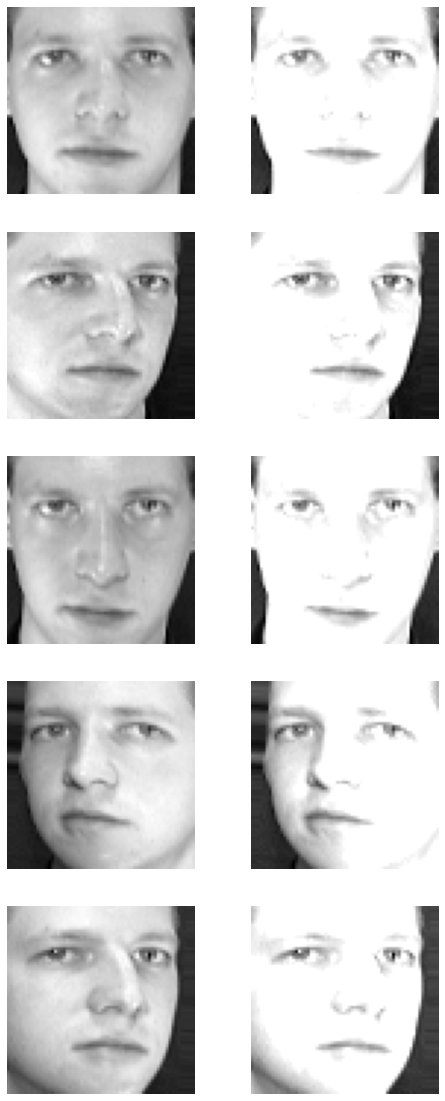

In [160]:
brighten_images = []
for i in range(len(images)):
    img = Image.fromarray(np.uint8(images[i] * 255), 'L')
    enh = ImageEnhance.Brightness(img)    
    brighten_images.append(np.array(enh.enhance(1.6)))
    
    
plot_images(images, brighten_images, 5)

Text(0.5, 1.0, 'Decompressed PCA brightened image')

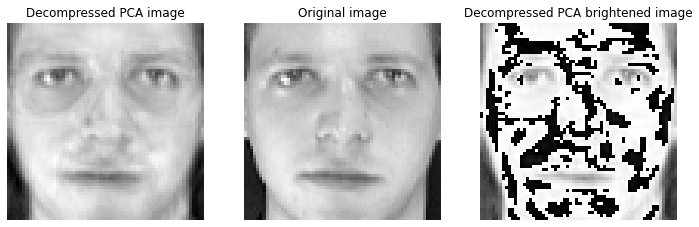

In [165]:
compressed = pca.fit_transform(reshape_img_arr(brighten_images))

decompressed = pca.inverse_transform(compressed)
decompressed_b = []
for img in decompressed:
    img_b = Image.fromarray(np.uint8(img.reshape(64, 64)), 'L')
    enh = ImageEnhance.Brightness(img_b)
    
    decompressed_b.append(np.array(enh.enhance(5/8)) / 255)

decompressed_b = np.array(decompressed_b)
image_pca_b = decompressed[0,:].reshape([64,64])
image_pca_b = Image.fromarray(np.uint8(image_pca_b), 'L').rotate(-90)
f, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(image_pca, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Decompressed PCA image')
ax[1].imshow(images[0], cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original image')
ax[2].imshow(decompressed_b[0], cmap='gray')
ax[2].axis('off')
ax[2].set_title('Decompressed PCA brightened image')

In [166]:
MSE_b = np.sum(np.square(df - decompressed_b.reshape(400, 4096)), axis=1) / 4096
RMSE_b = np.sqrt(MSE_b)
RMSE_b.describe()

count    400.000000
mean       0.270863
std        0.092353
min        0.029821
25%        0.225261
50%        0.287348
75%        0.334653
max        0.451948
dtype: float64

In [168]:
np.mean(RMSE)

0.035140444

### Obserwacje
W przypadku rozjaśniania obserwujemy inny rząd wielkości, RMSE dla rozjaśnionych zdjęć jest około 10 razy większe niż dla zwykłych.

# Odbicie

In [173]:
images_to_mirror = images
mirrored_images = []
for i in range(len(images)):
    img = Image.fromarray(np.uint8(images_to_mirror[i] * 255), 'L')
    mirrored_images.append(np.array(ImageOps.mirror(img)))

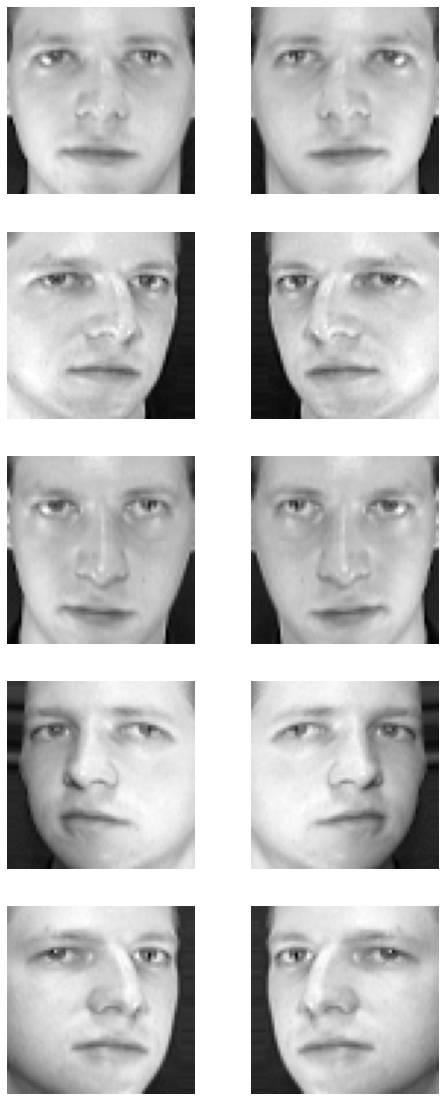

In [174]:
plot_images(images_to_mirror, mirrored_images, 5)

Text(0.5, 1.0, 'Decompressed PCA mirrored image')

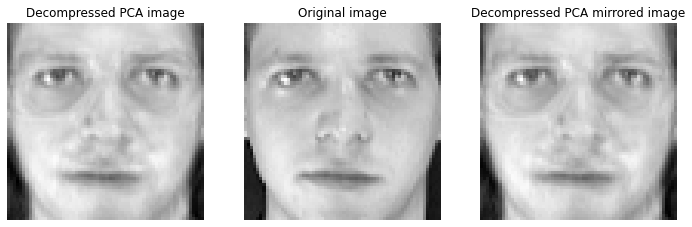

In [176]:
compressed = pca.fit_transform(reshape_img_arr(mirrored_images))

decompressed = pca.inverse_transform(compressed)
decompressed_m = []
for img in decompressed:
    img_m = Image.fromarray(np.uint8(img.reshape(64, 64)), 'L')
    mir_img = ImageOps.mirror(img_m)    
    decompressed_m.append(np.array(mir_img) / 255)

decompressed_m = np.array(decompressed_m)
image_pca_m = decompressed[0,:].reshape([64,64])
image_pca_m = Image.fromarray(np.uint8(image_pca_m), 'L').rotate(-90)
f, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(image_pca, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Decompressed PCA image')
ax[1].imshow(images[0], cmap='gray')
ax[1].axis('off')
ax[1].set_title('Original image')
ax[2].imshow(decompressed_m[0], cmap='gray')
ax[2].axis('off')
ax[2].set_title('Decompressed PCA mirrored image')

In [177]:
MSE_m = np.sum(np.square(df - decompressed_m.reshape(400, 4096)), axis=1) / 4096
RMSE_m = np.sqrt(MSE_m)
RMSE_m.describe()

count    400.000000
mean       0.035514
std        0.004447
min        0.024115
25%        0.032504
50%        0.035322
75%        0.038765
max        0.047100
dtype: float64

### Obserwacje
Średnie RMSE jest bardzo podobne.

## Wnioski
Rozjaśnianie, przyciemnianie zaburzają działanie PCA. Z kolei obracanie zdjęcia ma na to znikomy wpływ.